<a href="https://colab.research.google.com/github/Kyawhtin21501/maths_python/blob/main/student_data_set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

!pip install kagglehub[pandas-datasets]


from google.colab import files
uploaded = files.upload()


import os
kaggle_json_name = list(uploaded.keys())[0]
os.makedirs("/root/.kaggle", exist_ok=True)
!mv {kaggle_json_name} /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json


import kagglehub
from kagglehub import KaggleDatasetAdapter
import pandas as pd

dataset_name = "miadul/student-performance-dataset"


%mkdir -p /kaggle/input/student-performance-dataset
dataset_path = "/kaggle/input/student-performance-dataset"
%ls {dataset_path}


all_files = os.listdir(dataset_path)
df_list = []

for file in all_files:
    if file.endswith(".csv"):
        df_tmp = kagglehub.load_dataset(
            KaggleDatasetAdapter.PANDAS,
            dataset_name,
            file
        )
        df_list.append(df_tmp)


df_all = pd.concat(df_list, ignore_index=True)


print("All data shape:", df_all.shape)
print(df_all.head())


Saving kaggle.json to kaggle (4).json
/bin/bash: -c: line 1: syntax error near unexpected token `('
/bin/bash: -c: line 1: `mv kaggle (4).json /root/.kaggle/kaggle.json'
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
synthetic_student_performance.csv


/tmp/ipython-input-1158930860.py:32: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df_tmp = kagglehub.load_dataset(


All data shape: (5000, 15)
   StudentID  Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  \
0       1001   17       1          1                  3               16   
1       1002   18       1          2                  0               17   
2       1003   15       1          0                  1               13   
3       1004   17       1          0                  3                6   
4       1005   17       0          1                  2                6   

   Absences  Tutoring  ParentalSupport  Extracurricular  Sports  Music  \
0        13         0                2                0       0      0   
1        28         0                2                1       1      1   
2        18         1                4                0       0      0   
3         4         0                3                1       0      0   
4        20         0                4                0       0      0   

   Volunteering       GPA  GradeClass  
0             0  3.158425      

In [8]:
!sudo apt-get -y update
%pip -q install --upgrade pip
%pip -q install jupyterlab

# cloudflared バイナリ取得
!curl -L https://github.com/cloudflare/cloudflared/releases/latest/download/cloudflared-linux-amd64 -o cloudflared
!chmod +x cloudflared


Hit:1 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:6 https://cli.github.com/packages stable InRelease
Hit:7 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Hit:11 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
  % Total    %

In [10]:

import secrets, os, textwrap, subprocess, time


TOKEN = secrets.token_urlsafe(32)
open("/tmp/jupyter_token.txt","w").write(TOKEN)


cmd = (
    "nohup jupyter lab "
    "--no-browser --ip=0.0.0.0 --port=8888 "
    f"--ServerApp.token='{TOKEN}' "
    "> /tmp/jupyter.log 2>&1 &"
)
os.system(cmd)
time.sleep(3)

print("JUPYTER_TOKEN =", TOKEN)
print("---- last log lines ----")
print(subprocess.getoutput("tail -n 20 /tmp/jupyter.log"))


JUPYTER_TOKEN = Q2uyzBpYSz4QRiCTjzKtim7dNkIhQgzfRe44Mbxfo2o
---- last log lines ----
[W 2025-08-30 06:17:01.612 ServerApp] ServerApp.token config is deprecated in 2.0. Use IdentityProvider.token.


In [11]:
# Step 3: Cloudflare Tunnel で Jupyter を外部公開
!nohup ./cloudflared tunnel --no-autoupdate --url http://localhost:8888 --logfile /tmp/cloudflared.log > /dev/null 2>&1 &

import time, re, pathlib
time.sleep(4)  # トンネルが立ち上がるまで少し待つ

# 公開URLをログから取得
log = pathlib.Path("/tmp/cloudflared.log").read_text(errors="ignore")
m = re.search(r"https://[0-9a-z\-]+\.trycloudflare\.com", log)
public_url = m.group(0) if m else None

# トークンを読み込む
token = pathlib.Path("/tmp/jupyter_token.txt").read_text().strip()

print("PUBLIC_URL =", public_url)                # トークンなしのURL
print("CONNECT_URL =", f"{public_url}/?token={token}")  # トークン付きの完全URL


PUBLIC_URL = https://judges-destiny-partner-vertical.trycloudflare.com
CONNECT_URL = https://judges-destiny-partner-vertical.trycloudflare.com/?token=Q2uyzBpYSz4QRiCTjzKtim7dNkIhQgzfRe44Mbxfo2o


In [ ]:
"""
About Dataset
This dataset contains 5,000 synthetic records of high school students, capturing their demographics, study habits, parental involvement, extracurricular activities, and academic performance. The target variable, GradeClass, categorizes students’ academic achievement into five classes (A–F), making this dataset ideal for:

🎓 Educational research
🤖 Predictive modeling & Machine Learning classification
📊 Statistical analysis of factors influencing student performance
This is a synthetic dataset generated for educational and research purposes. No real student data is used.

📑 Table of Contents

Student Information
StudentID
Demographic Details
Age
Gender
Ethnicity
ParentalEducation
Study Habits
StudyTimeWeekly
Absences
Tutoring
Parental Involvement
ParentalSupport
Extracurricular Activities
Extracurricular
Sports
Music
Volunteering
Academic Performance
GPA
Target Variable
* GradeClass

📂 Column Description

🎓 Student Information

StudentID → Unique identifier for each student (1001 to 6000).
👤 Demographic Details

Age → Student’s age (15–18).
Gender → Gender of the student (0 = Male, 1 = Female).
Ethnicity → Ethnicity category:
0 = Caucasian
1 = African American
2 = Asian
3 = Other
ParentalEducation → Education level of parents:
0 = None
1 = High School
2 = Some College
3 = Bachelor’s
4 = Higher
📚 Study Habits

StudyTimeWeekly → Weekly study time (hours, 0–20).
Absences → Number of school absences (0–30).
Tutoring → Whether the student receives tutoring (0 = No, 1 = Yes).
👨‍👩‍👧 Parental Involvement

ParentalSupport → Level of parental support:
0 = None
1 = Low
2 = Moderate
3 = High
4 = Very High
🎭 Extracurricular Activities

Extracurricular → Participation in extracurricular activities (0 = No, 1 = Yes).
Sports → Participation in sports (0 = No, 1 = Yes).
Music → Participation in music (0 = No, 1 = Yes).
Volunteering → Participation in volunteering (0 = No, 1 = Yes).
🏆 Academic Performance

GPA → Grade Point Average (scale 2.0–4.0). Influenced by study habits, absences, and support.
🎯 Target Variable

GradeClass → Grade classification based on GPA:
0 = A (GPA ≥ 3.5)
1 = B (3.0 ≤ GPA < 3.5)
2 = C (2.5 ≤ GPA < 3.0)
3 = D (2.0 ≤ GPA < 2.5)
* 4 = F (GPA < 2.0)

✅ Conclusion

This dataset provides a comprehensive overview of factors affecting student performance. It can be used to:

Build classification models
Study the effect of demographics & activities on GPA
* Teach data analysis and machine learning in education

📜 License

CC BY 4.0 (Attribution 4.0 International) You are free to: ✔ Share — copy and redistribute the material in any medium or format ✔ Adapt — remix, transform, and build upon the material for any purpose

⚠ Attribution required — You must give appropriate credit when using this dataset.
"""

'\nAbout Dataset\nThis dataset contains 5,000 synthetic records of high school students, capturing their demographics, study habits, parental involvement, extracurricular activities, and academic performance. The target variable, GradeClass, categorizes students’ academic achievement into five classes (A–F), making this dataset ideal for:\n\n🎓 Educational research\n🤖 Predictive modeling & Machine Learning classification\n📊 Statistical analysis of factors influencing student performance\nThis is a synthetic dataset generated for educational and research purposes. No real student data is used.\n\n📑 Table of Contents\n\nStudent Information\nStudentID\nDemographic Details\nAge\nGender\nEthnicity\nParentalEducation\nStudy Habits\nStudyTimeWeekly\nAbsences\nTutoring\nParental Involvement\nParentalSupport\nExtracurricular Activities\nExtracurricular\nSports\nMusic\nVolunteering\nAcademic Performance\nGPA\nTarget Variable\n* GradeClass\n\n📂 Column Description\n\n🎓 Student Information\n\nStuden

In [ ]:
df = df_all.copy()

In [ ]:
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,1,3,16,13,0,2,0,0,0,0,3.158425,1
1,1002,18,1,2,0,17,28,0,2,1,1,1,0,2.794655,2
2,1003,15,1,0,1,13,18,1,4,0,0,0,1,3.774847,0
3,1004,17,1,0,3,6,4,0,3,1,0,0,0,3.040574,1
4,1005,17,0,1,2,6,20,0,4,0,0,0,0,3.382310,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          5000 non-null   int64  
 1   Age                5000 non-null   int64  
 2   Gender             5000 non-null   int64  
 3   Ethnicity          5000 non-null   int64  
 4   ParentalEducation  5000 non-null   int64  
 5   StudyTimeWeekly    5000 non-null   int64  
 6   Absences           5000 non-null   int64  
 7   Tutoring           5000 non-null   int64  
 8   ParentalSupport    5000 non-null   int64  
 9   Extracurricular    5000 non-null   int64  
 10  Sports             5000 non-null   int64  
 11  Music              5000 non-null   int64  
 12  Volunteering       5000 non-null   int64  
 13  GPA                5000 non-null   float64
 14  GradeClass         5000 non-null   int64  
dtypes: float64(1), int64(14)
memory usage: 586.1 KB


In [ ]:
df.isnull().sum()

,0
StudentID,0
Age,0
Gender,0
Ethnicity,0
ParentalEducation,0
StudyTimeWeekly,0
Absences,0
Tutoring,0
ParentalSupport,0
Extracurricular,0


In [ ]:
df.head()


,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,1,3,16,13,0,2,0,0,0,0,3.158425,1
1,1002,18,1,2,0,17,28,0,2,1,1,1,0,2.794655,2
2,1003,15,1,0,1,13,18,1,4,0,0,0,1,3.774847,0
3,1004,17,1,0,3,6,4,0,3,1,0,0,0,3.040574,1
4,1005,17,0,1,2,6,20,0,4,0,0,0,0,3.382310,1


In [ ]:
df["Gender"] = df["Gender"].replace({0: "Male", 1: "Female"})
df["Ethnicity"] = df["Ethnicity"].replace({0: "Caucasian", 1: "African American", 2: "Asian", 3: "Other"})
#df["ParentalEducation"] = df["ParentalEducation"].replace({0: "None", 1: "High School", 2: "Some College", 3: "Bachelor's", 4: "Higher"})

In [ ]:
std_of_age = df["Age"].std()
mean_of_age = df["Age"].mean()
print("Standard Deviation of Age:", std_of_age)
print("Mean of Age:", mean_of_age)

Standard Deviation of Age: 1.12713577132899
Mean of Age: 16.4852


In [ ]:
percentage_of_gender = df["Gender"].value_counts(normalize=True) * 100
print("Percentage of Gender:")
print(percentage_of_gender)

Percentage of Gender:
Gender
Female    51.02
Male      48.98
Name: proportion, dtype: float64


In [ ]:
data_discribe = df.describe()
GPA_discribe = data_discribe["GPA"]
sort_GPA = df["GPA"].sort_values(ascending=True)
medium_GPA = sort_GPA.median()

GPA_IQR = sort_GPA.quantile(0.75) - sort_GPA.quantile(0.25)
print("GPA IQR:", GPA_IQR)
smalle_outlier = sort_GPA < (sort_GPA.quantile(0.25) - (1.5 * GPA_IQR))
big_outlier = sort_GPA > (sort_GPA.quantile(0.75) + (1.5 * GPA_IQR))
print("Smalle Outerlier:", smalle_outlier)
print("Big Outerlier:", big_outlier)
print("Data Discribe:")
print(data_discribe)
print("Medium GPA:", medium_GPA)
print("GPA Discribe:")
print(GPA_discribe)

GPA IQR: 1.0837853650024818
Smalle Outerlier: 4999    False
4857    False
4883    False
4965    False
751     False
        ...  
7       False
4995    False
11      False
4997    False
4998    False
Name: GPA, Length: 5000, dtype: bool
Big Outerlier: 4999    False
4857    False
4883    False
4965    False
751     False
        ...  
7       False
4995    False
11      False
4997    False
4998    False
Name: GPA, Length: 5000, dtype: bool
Data Discribe:
         StudentID          Age  ParentalEducation  StudyTimeWeekly  \
count  5000.000000  5000.000000        5000.000000      5000.000000   
mean   3500.500000    16.485200           2.099400        10.031800   
std    1443.520003     1.127136           1.229074         6.019438   
min    1001.000000    15.000000           0.000000         0.000000   
25%    2250.750000    15.000000           1.000000         5.000000   
50%    3500.500000    16.000000           2.000000        10.000000   
75%    4750.250000    18.000000           3.0

/tmp/ipython-input-2203945898.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_GPA["GPA"],palette="rocket")


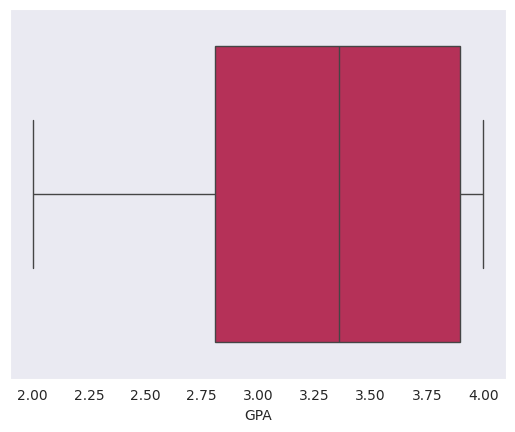

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


df_GPA = pd.DataFrame({
    "GPA": sort_GPA,
    "big": big_outlier,
    "small": smalle_outlier
})
sns.set_style("dark")
sns.color_palette("rocket", as_cmap=True)
sns.boxplot(x=df_GPA["GPA"],palette="rocket")
plt.show()

